In [17]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid
from Models.clustering import NCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [19]:
# bandwidth = 0.001
# grid_x    = grid(bandwidth, start=-2, end=15)
# mu        = np.array([1,1.1,1.2,5,5.5,6,10,11,12])

# # Chọn độ rộng cố định cho Uniform
# width = .1

# # Tính a và b sao cho mean = mu
# a_list = mu - width / 2
# b_list = mu + width / 2

# # Gọi lại hàm generateUniform
# F_data = generateUniform(a_list, b_list, grid_x)

In [20]:
bandwidth = 0.01
grid_x    = grid(bandwidth, start=-5, end=15)
mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])
sig       = np.ones_like(mu)
F_data    = generateGauss(mu, sig, grid_x)

In [21]:
cluster=NCF.Model(
   grid_x=grid_x,
    num_clusters=3,
    fuzziness=2,
    max_iterations= 100,
    tolerance= 1e-4,
    distance_metric= 'W2',
    verbose=True,
)
cluster.fit(F_data)
T, I, F, Theta, J = cluster.get_results()

[1] ΔC=1.21e+00, Obj=0.628998
[2] ΔC=3.68e-01, Obj=0.538609
[3] ΔC=2.05e-01, Obj=0.520284
[4] ΔC=1.65e-01, Obj=0.503059
[5] ΔC=1.32e-01, Obj=0.484945
[6] ΔC=1.01e-01, Obj=0.469254
[7] ΔC=7.60e-02, Obj=0.457395
[8] ΔC=5.79e-02, Obj=0.449168
[9] ΔC=4.60e-02, Obj=0.443683
[10] ΔC=3.83e-02, Obj=0.440037
[11] ΔC=3.29e-02, Obj=0.437557
[12] ΔC=2.89e-02, Obj=0.435801
[13] ΔC=2.56e-02, Obj=0.434502
[14] ΔC=2.29e-02, Obj=0.433495
[15] ΔC=2.05e-02, Obj=0.432686
[16] ΔC=1.84e-02, Obj=0.432015
[17] ΔC=1.65e-02, Obj=0.431448
[18] ΔC=1.49e-02, Obj=0.430960
[19] ΔC=1.34e-02, Obj=0.430536
[20] ΔC=1.20e-02, Obj=0.430166
[21] ΔC=1.08e-02, Obj=0.429841
[22] ΔC=9.71e-03, Obj=0.429555
[23] ΔC=8.73e-03, Obj=0.429303
[24] ΔC=7.85e-03, Obj=0.429079
[25] ΔC=7.06e-03, Obj=0.428882
[26] ΔC=6.34e-03, Obj=0.428706
[27] ΔC=5.70e-03, Obj=0.428551
[28] ΔC=5.12e-03, Obj=0.428413
[29] ΔC=4.60e-03, Obj=0.428291
[30] ΔC=4.13e-03, Obj=0.428182
[31] ΔC=3.71e-03, Obj=0.428085
[32] ΔC=3.33e-03, Obj=0.427999
[33] ΔC=2.99e-03,

<Figure size 3000x1500 with 0 Axes>

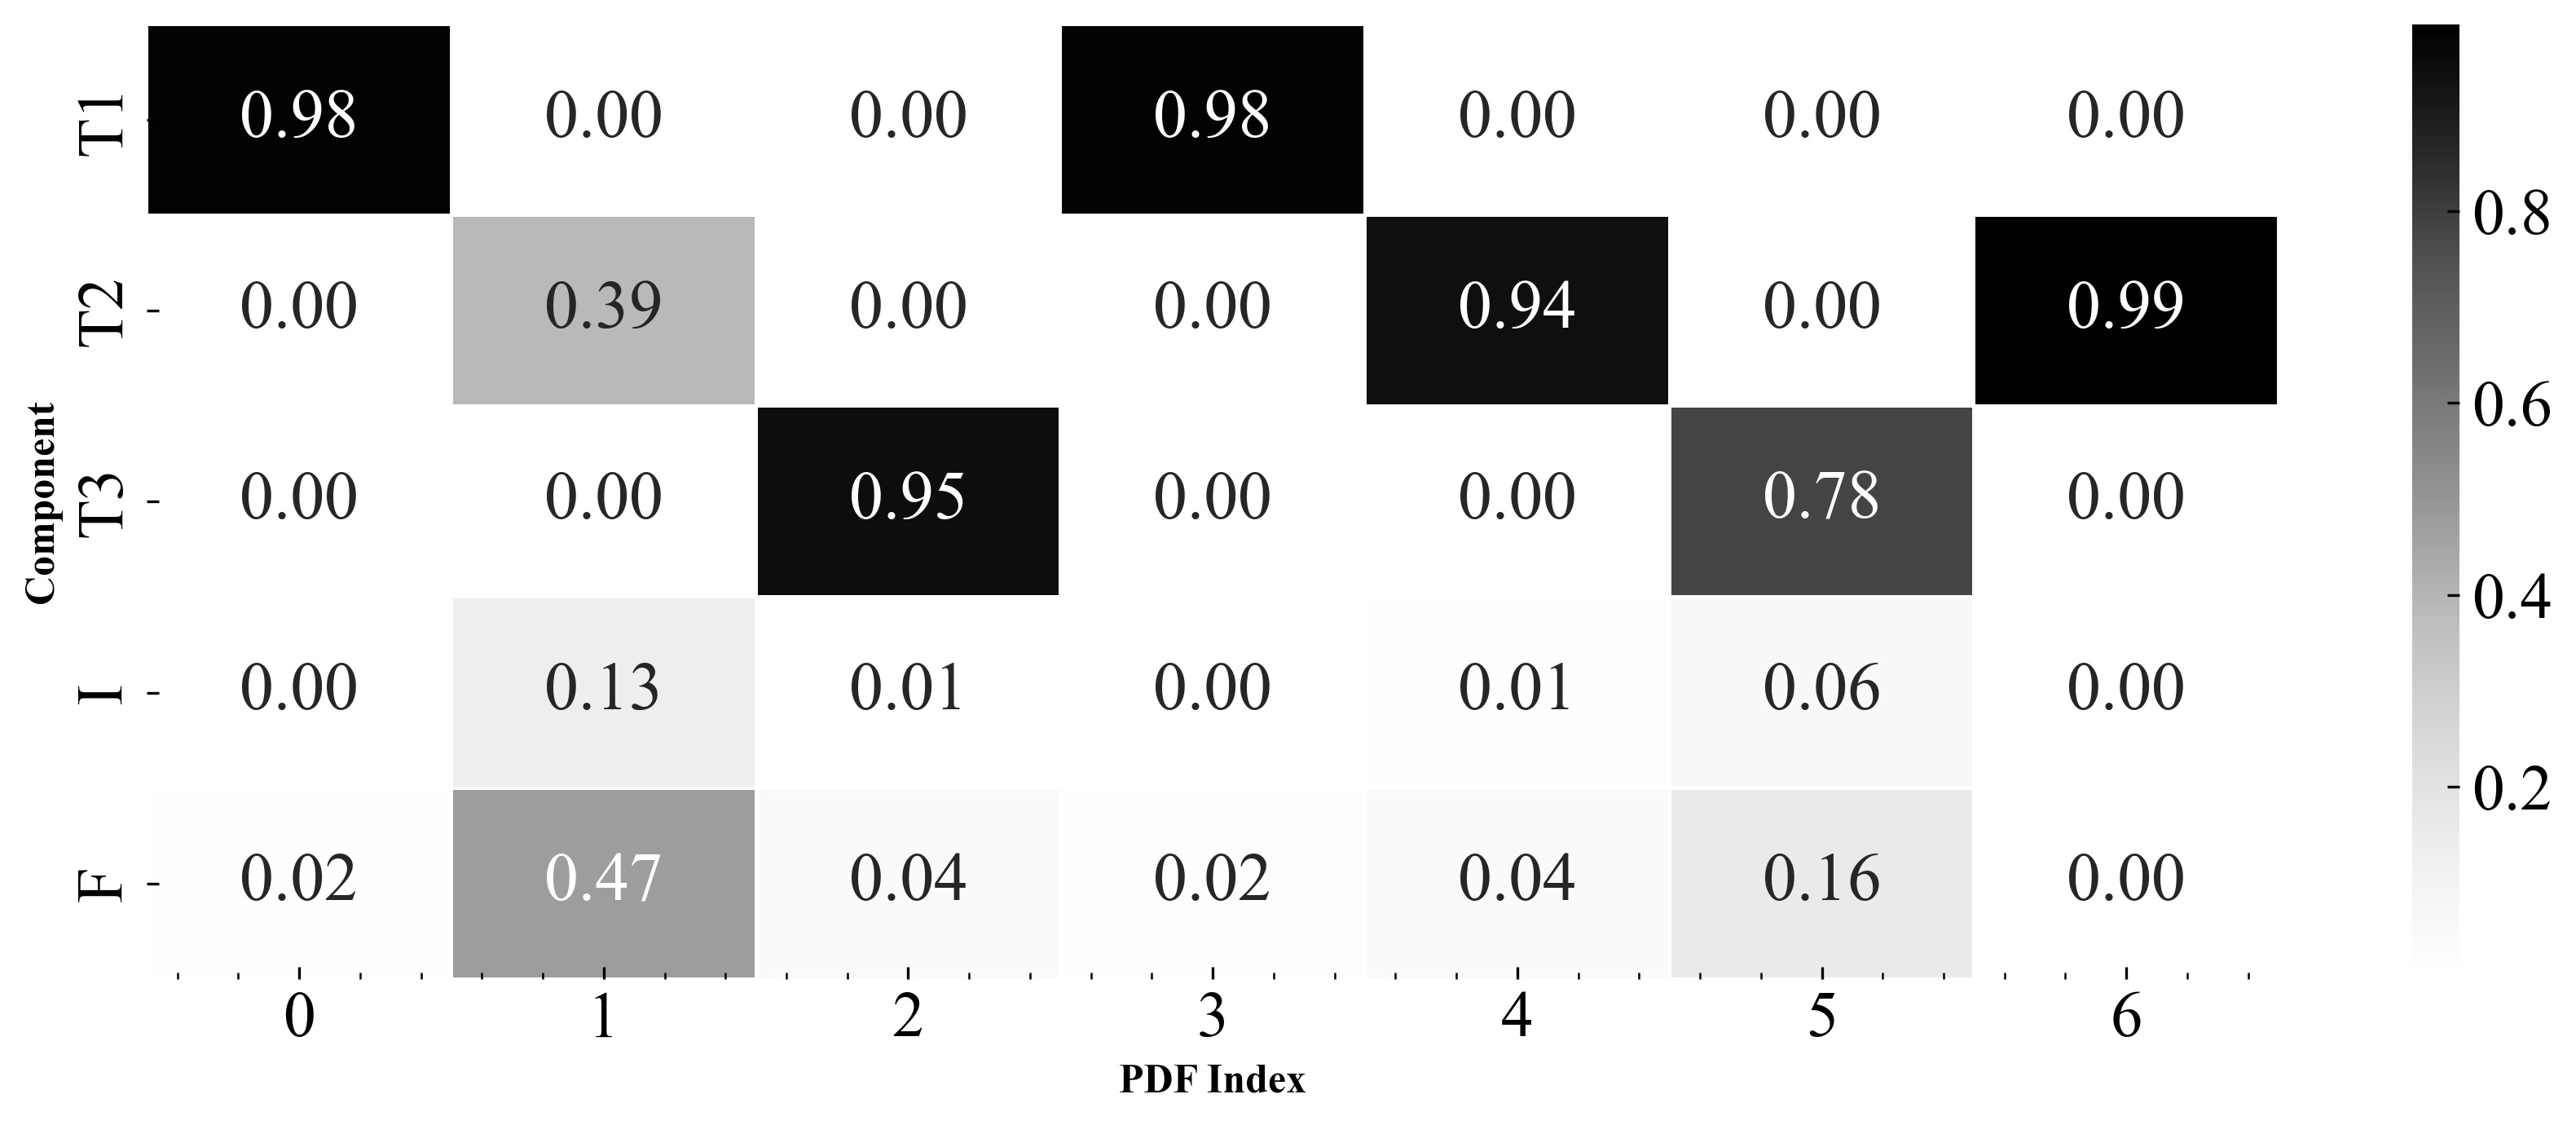

In [22]:
# plotHeatmap_U(U)
plt.figure(figsize=(10, 5))
temp(fontsize=20)


"""
Vẽ heatmap gồm 3 phần: T (membership), I (indeterminacy), F (hesitation).

- T: shape (num_pdfs, num_clusters)
- I, F: shape (num_pdfs,)
"""

T = T  # (num_clusters, num_pdfs)
I = I[None, :]  # (1, num_pdfs)
F = F[None, :]  # (1, num_pdfs)

# Ghép lại thành ma trận tổng thể
data_all = np.concatenate([T, I, F], axis=0)  # shape: (num_clusters+2, num_pdfs)

# Nhãn cho trục y
y_labels = [rf"T{j+1}" for j in range(T.shape[0])] + ["I", "F"]

# Vẽ
plt.figure(figsize=(12, 5))
sns.heatmap(
	data_all,
	annot=True,
	fmt=".2f",
	cmap='Greys',
	cbar=True,
	linewidths=0.5,
	linecolor='white',
	xticklabels=[f"{i}" for i in range(T.shape[1])],
	yticklabels=y_labels
)

plt.xlabel("PDF Index", fontsize=12)
plt.ylabel("Component", fontsize=12)
plt.tight_layout()
plt.show()

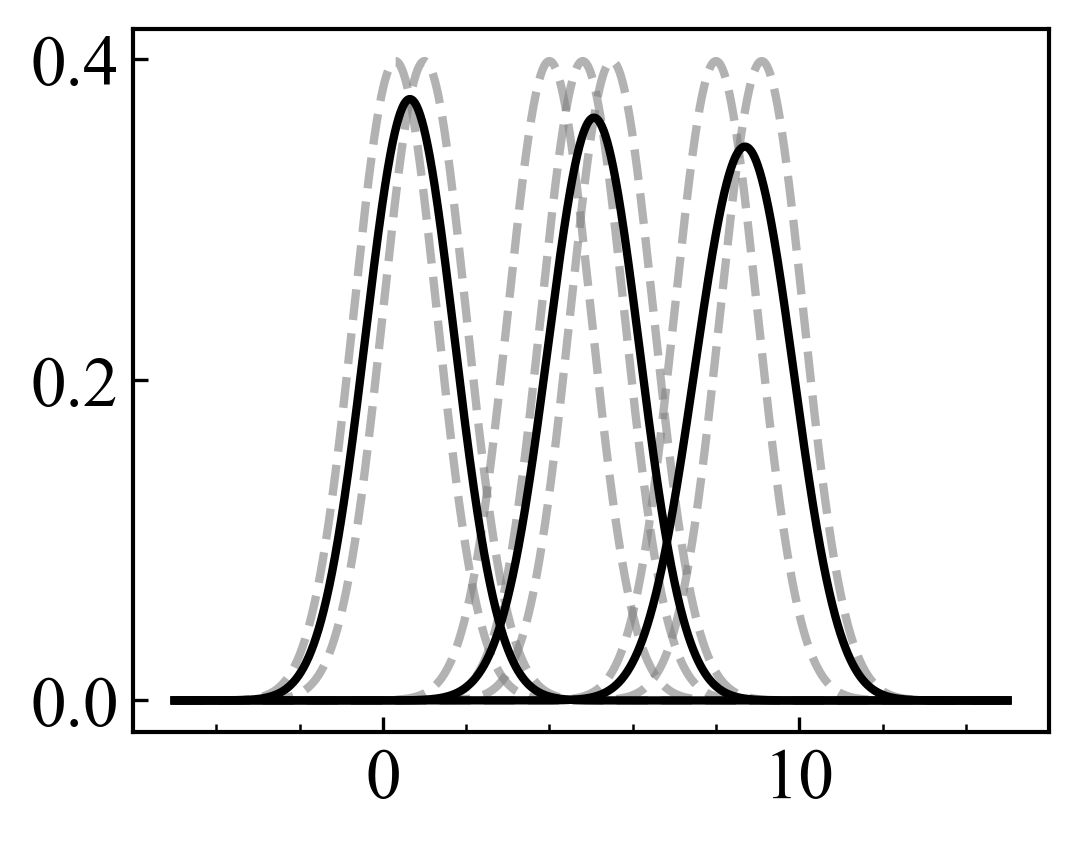

In [23]:
# plotPDF_Theta(grid_x, F_data, theta=Theta)
plt.figure()
temp(fontsize=18, w=12, h=8, u='centimeters')

# pdfs
for i in range(cluster.num_pdfs):
	plt.plot(grid_x, F_data[i, :], lw=2, color='gray', linestyle='--', alpha=0.6)

# prototype
for j in range(cluster.num_clusters):
	plt.plot(grid_x, Theta[j, :], lw=2, linestyle='-', color='black')

plt.tight_layout()

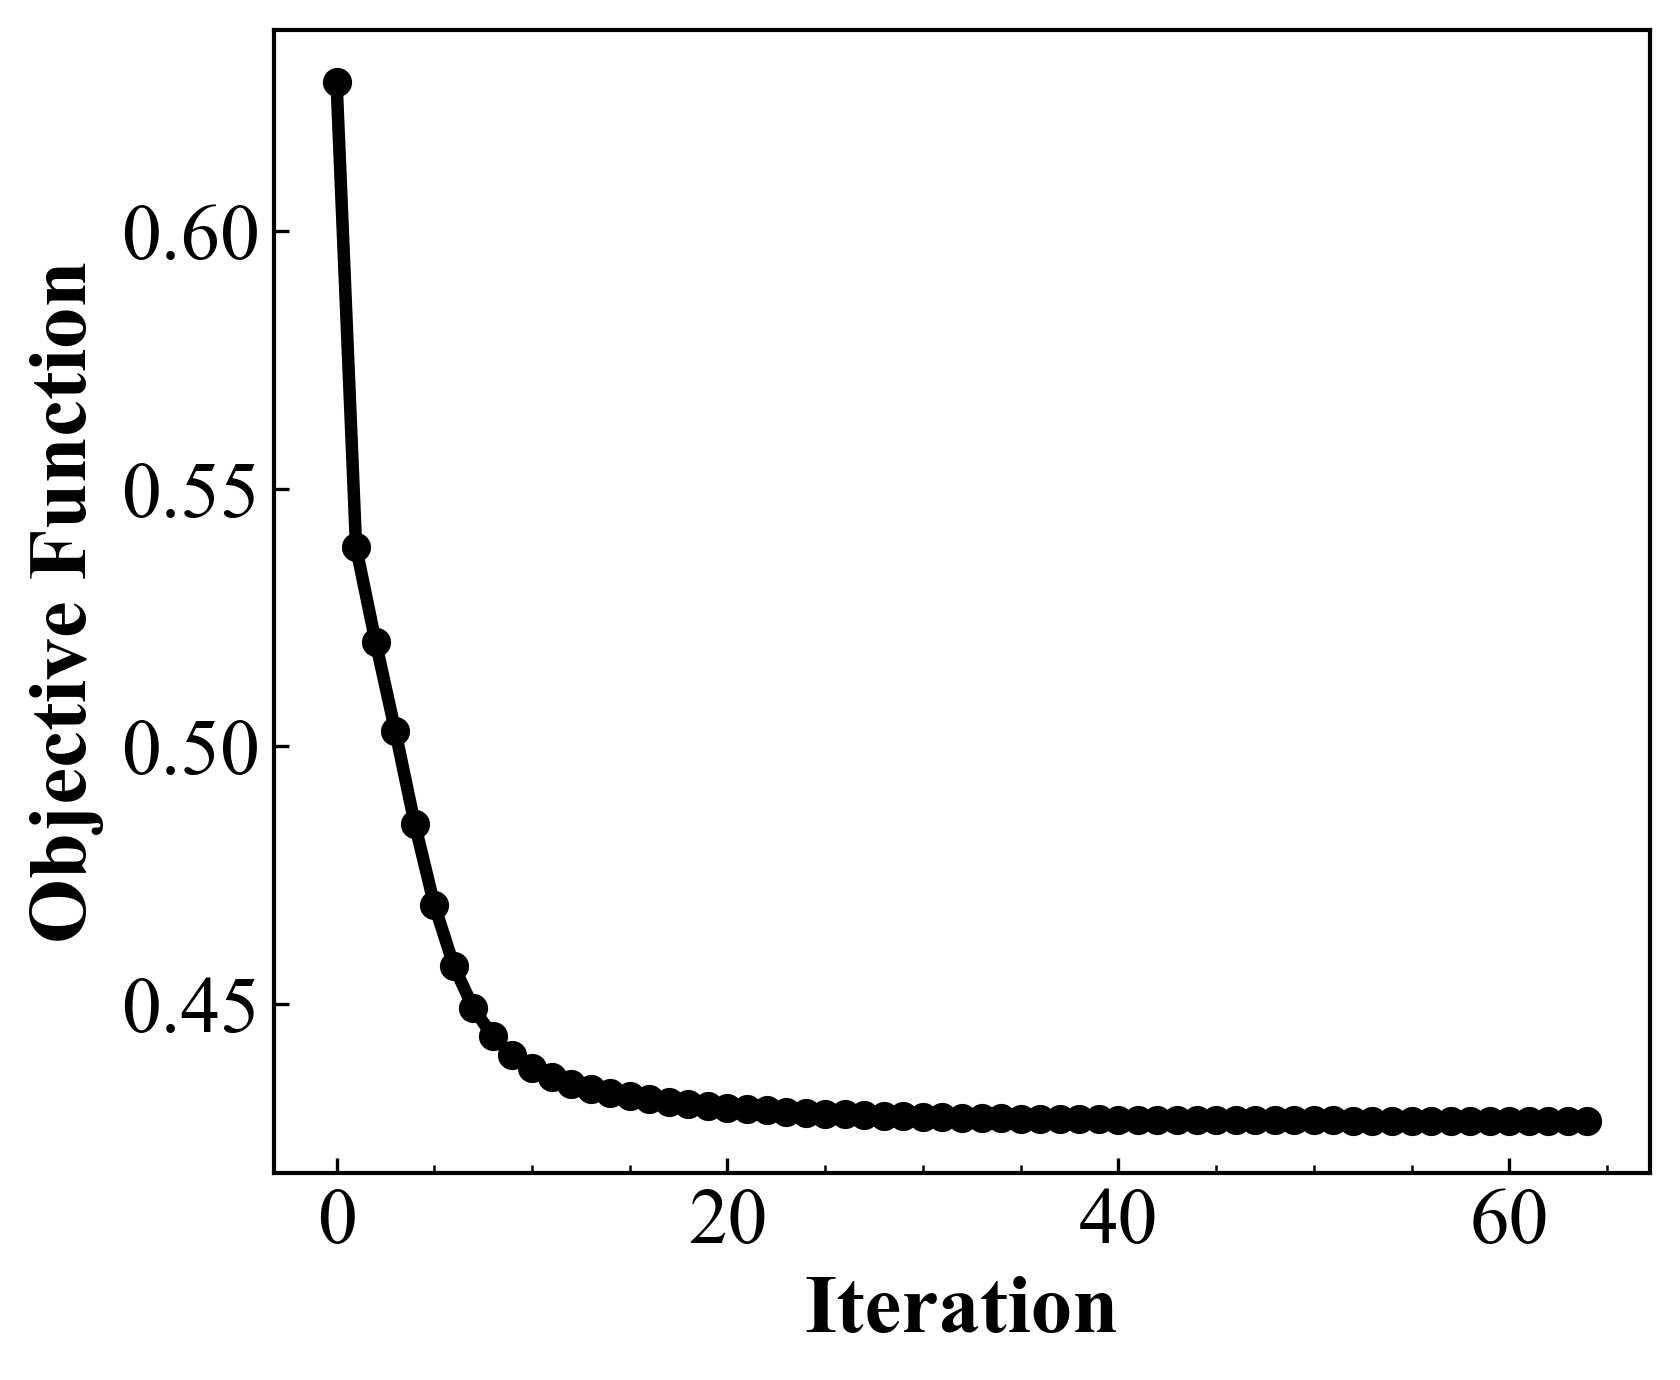

In [24]:
# plot_OF(J)
plt.figure(figsize=(6, 5))
temp(fontsize=20)

plt.plot(J, lw = 3,color = 'black', marker='o')
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.tight_layout()

In [25]:
# from utils.vali import CVI

# evaluator = CVI(distance_metric='L2',bandwidth=bandwidth, grid=grid_x)


# sil = evaluator.silhouette_index(F_data, labels)
# dunn = evaluator.dunn_index(F_data, labels)
# dbi = evaluator.davies_bouldin_index(F_data, labels)

# print(f"Silhouette = {sil:.4f}, Dunn = {dunn:.4f}, DBI = {dbi:.4f}")

In [26]:
# sil_values = plot_silhouette_values(F_data, labels,
#                                     distance_metric='L2',
#                                     bandwidth=bandwidth,
#                                     grid=grid_x)
# print("Silhouette fj:", sil_values)

In [27]:
# num_clusters_range = range(2, 8)
# silhouette_scores, dunn_scores, dbi_scores = [], [], []

# for k in num_clusters_range:
# 	cluster = FCF.Model(
# 	grid_x=grid_x,
# 	num_clusters=k,
# 	fuzziness=2,
# 	max_iterations=100,
# 	tolerance=1e-5,
# 	centroid_mode="frechet",
# 	distance_metric='W2',
# 	verbose=False
# 	)
# 	cluster.fit(F_data)
# 	labels = cluster.get_hard_assignments()
# 	evaluator = CVI(distance_metric='W2', bandwidth=bandwidth, grid=grid_x)

# 	sil = evaluator.silhouette_index(F_data, labels)
# 	dunn = evaluator.dunn_index(F_data, labels)
# 	dbi = evaluator.davies_bouldin_index(F_data, labels)

# 	silhouette_scores.append(sil)
# 	dunn_scores.append(dunn)
# 	dbi_scores.append(dbi)

# plot_CVI_with_k(num_clusters_range, silhouette_scores, dunn_scores, dbi_scores)